In [660]:
import numpy as np 
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns

# End to End EDA:
# MISSING VALUES: 
# Outlier analysis and Removal: boxplot & normal distribution(statistical methods)
#  ** Features Engineering ** (to extract the new feature from the existing one )
# **Statistical Analaysis to verify the relation between Predictor and TGT *** 
# Data Transformation and Scaling & Encoding : Also known as data preprocesing stage
# final step is 
## ** Model Building **

In [777]:
x=pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [778]:
z=pd.read_csv("test_AbJTz2l.csv")

In [780]:
x.shape

(8523, 12)

In [663]:
sales=pd.concat([x,z])

In [664]:
sales.shape

(14204, 12)

In [745]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26


In [666]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [667]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [669]:
# Check the head of the data /preview the data
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [668]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [538]:
# Target variable is defined as the which we will have to find out or predict for the future/
# in EDA it is called dependent variable 
# in this the Item_outlet sales is a target variable 



In [539]:
# Predicotors vs target variable :: independent varibales vs Dependent variable

In [540]:
# To find the list of numerical and categorical columns

In [670]:
nums=sales.select_dtypes(include=np.number).columns # to find the numerical variables in a dataset
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# UNIVARIATE Analysis:

In [671]:
len(nums)

5

In [543]:
# Plotting the graph using Loop:

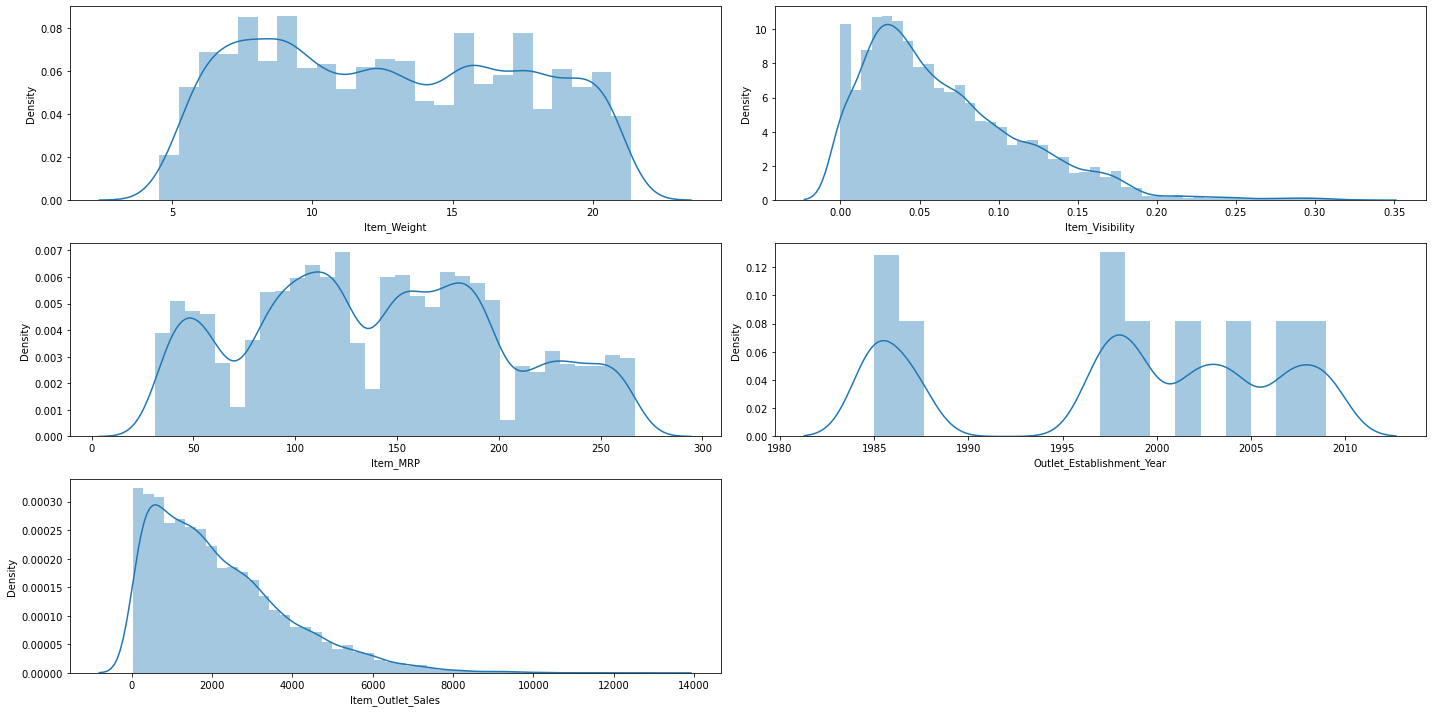

In [672]:
import matplotlib.pyplot as plt
# for warnings
import warnings
warnings.filterwarnings('ignore')
#Plot dimension
plt.rcParams['figure.figsize']=[20,10]

n_rows=3
n_cols=2
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter) # Creating the space for 6 plots so the plots can be shown 
    sns.distplot(sales.loc[:,i].dropna()) # command for creating distplot using loop, i is iterating through the columns
                                          #.dropna()is used to drop the missing values in the columns
    counter+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

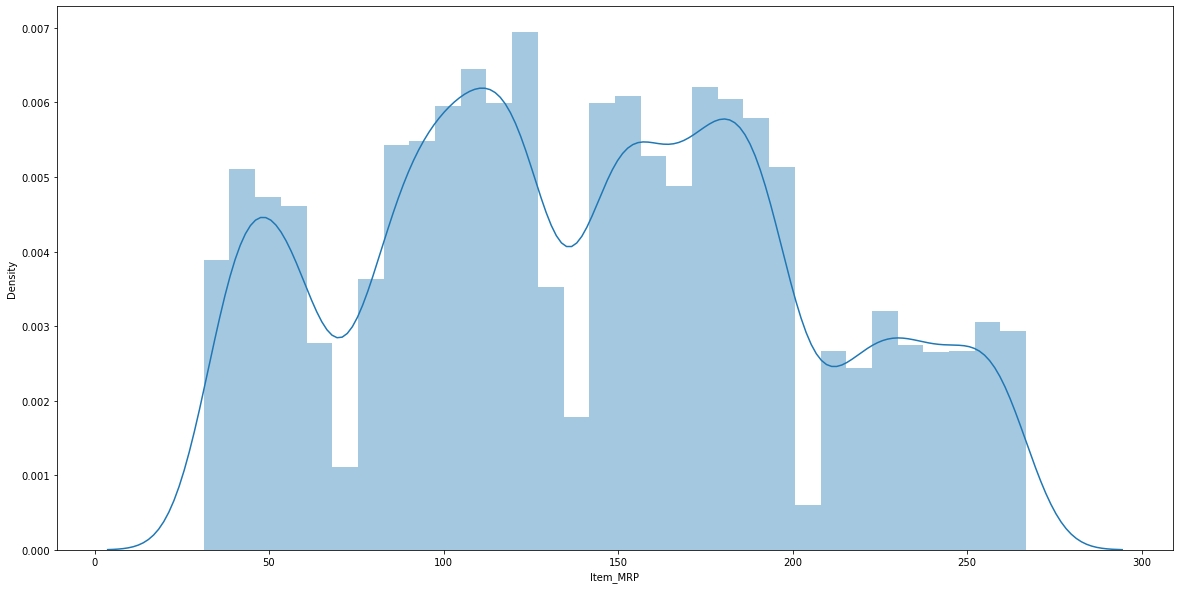

In [673]:
sns.distplot(sales.loc[:,'Item_MRP'])

In [546]:
# This is a mutimodal data Because there are multiple modes of the product


# Inferences

In [547]:
#1.Item outlet sales is positively skewed in nature
#2.No pattern sen in outlet EST year
#3.Item MRP is found to be multimodal in nature.
#4.Item weight is uniform in nature

In [548]:
# Plotting the categorical column

In [674]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

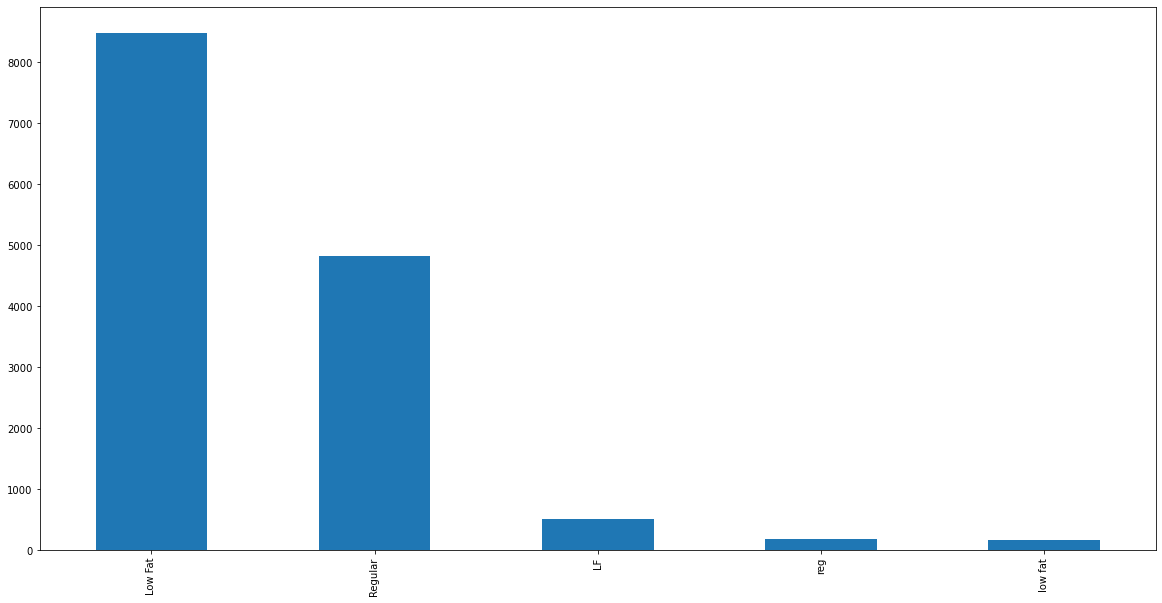

In [676]:
# Item fat content
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [551]:
# replace the LF and REg in their respective categories

In [552]:
sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

<AxesSubplot:>

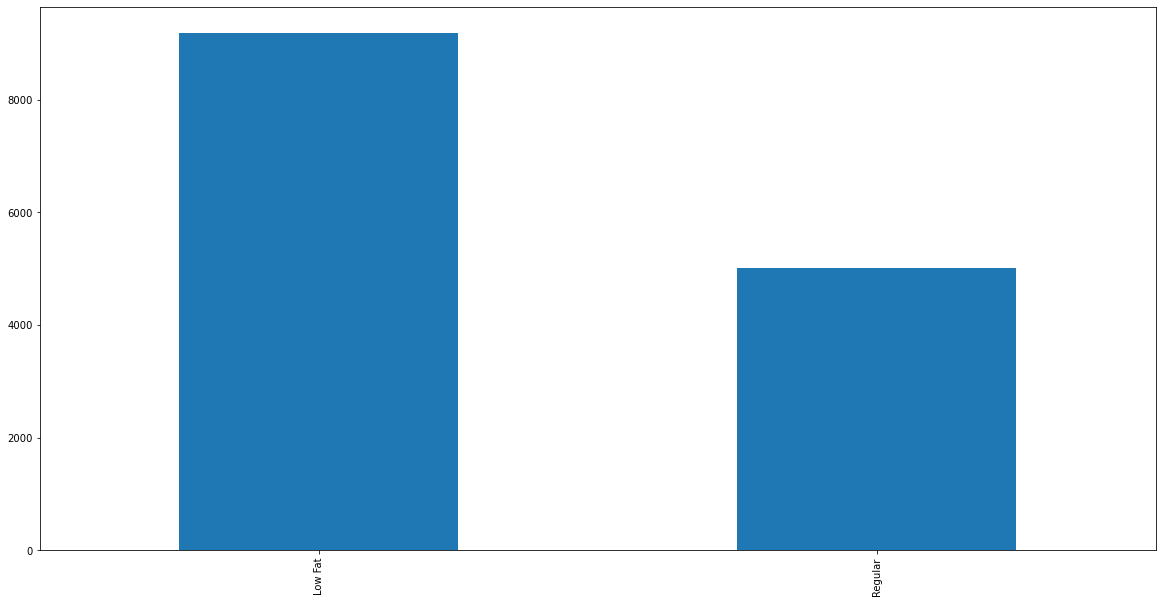

In [553]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [554]:
# Item Type 

<AxesSubplot:>

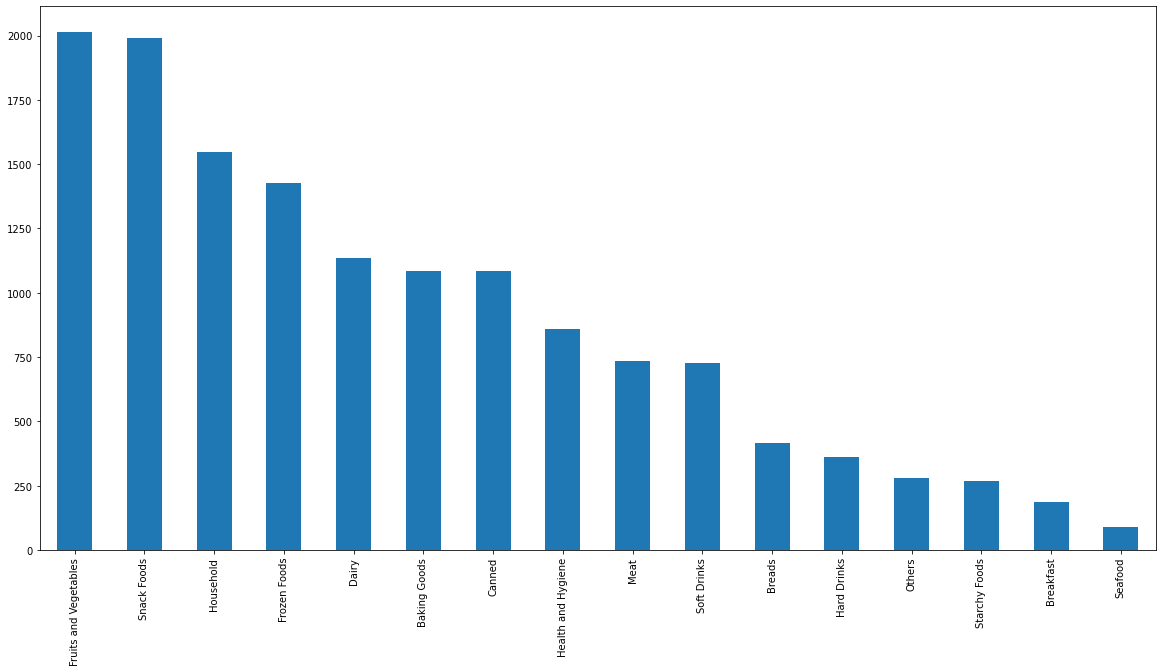

In [555]:
sales.Item_Type.value_counts().plot(kind='bar')

In [556]:
sales.Item_Type.value_counts().index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Baking Goods', 'Canned', 'Health and Hygiene', 'Meat',
       'Soft Drinks', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods',
       'Breakfast', 'Seafood'],
      dtype='object')

# Infrence :
 Top 5 selling product types are :
 'Fruits and Vegetables',
'Snack Foods', 
'Household', 
'Frozen Foods',
'Dairy'
       

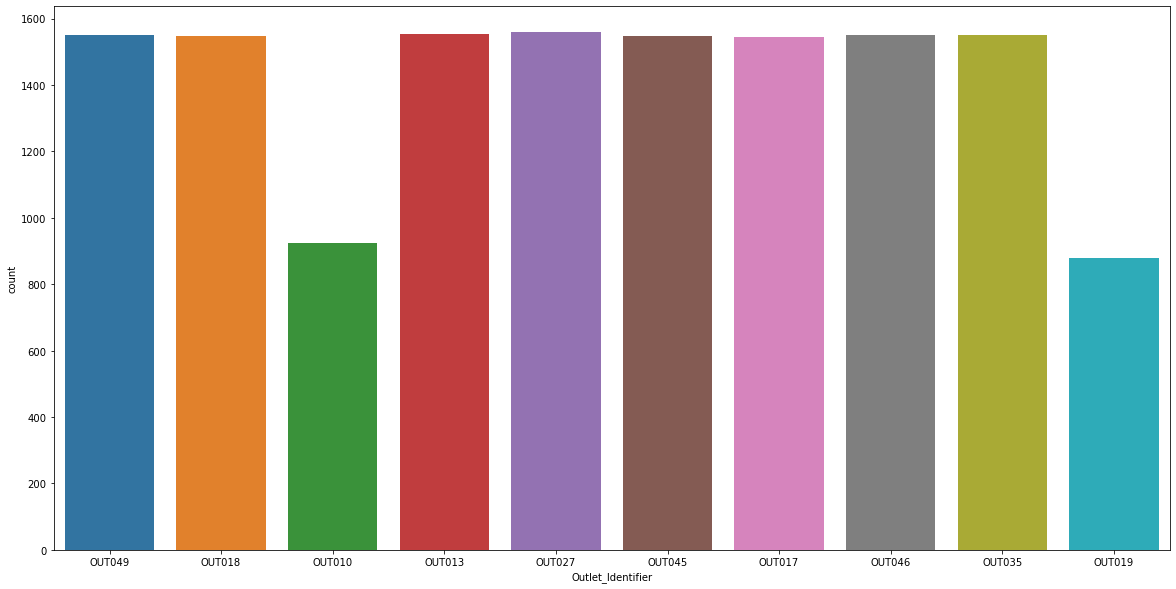

In [557]:
# Outlet_id
sns.countplot(sales.Outlet_Identifier)
plt.show()

# HYPOTHESIS: the outlet 10 and outlet 19 has the lowest sales as compare to the other outlets 

In [558]:
# we will check our hypothesis 

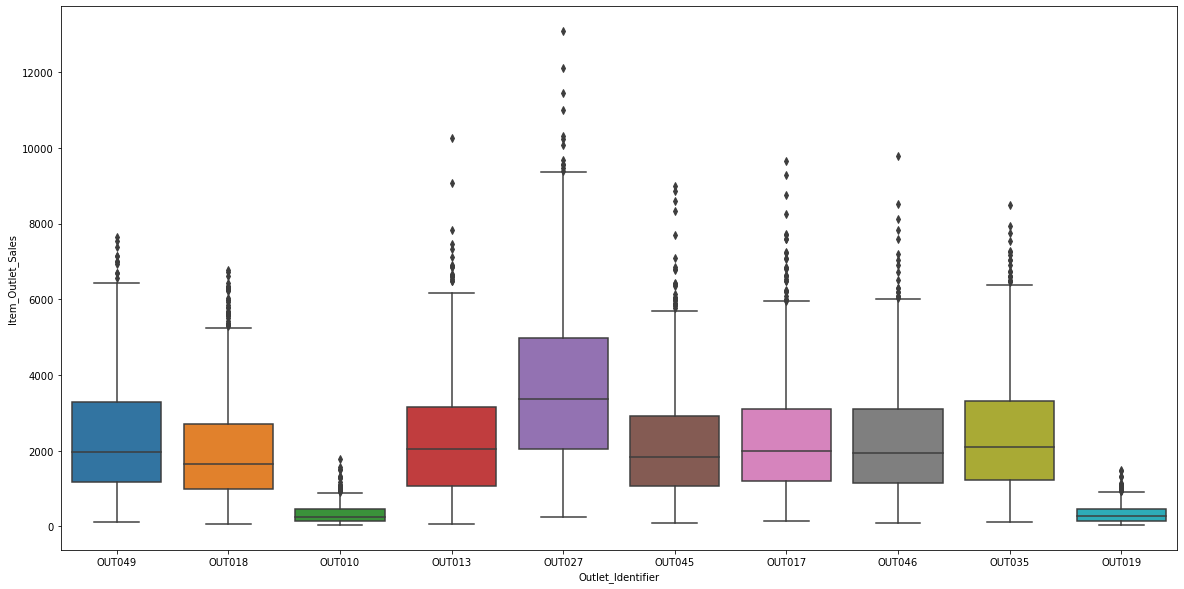

In [559]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales)
plt.show()

# NOTE  If the frequency is less then the effect on the target variable is also less

In [560]:
# Most performing outlet is outlet 27

In [561]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [562]:
# OUTLET SIZE

In [563]:
sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

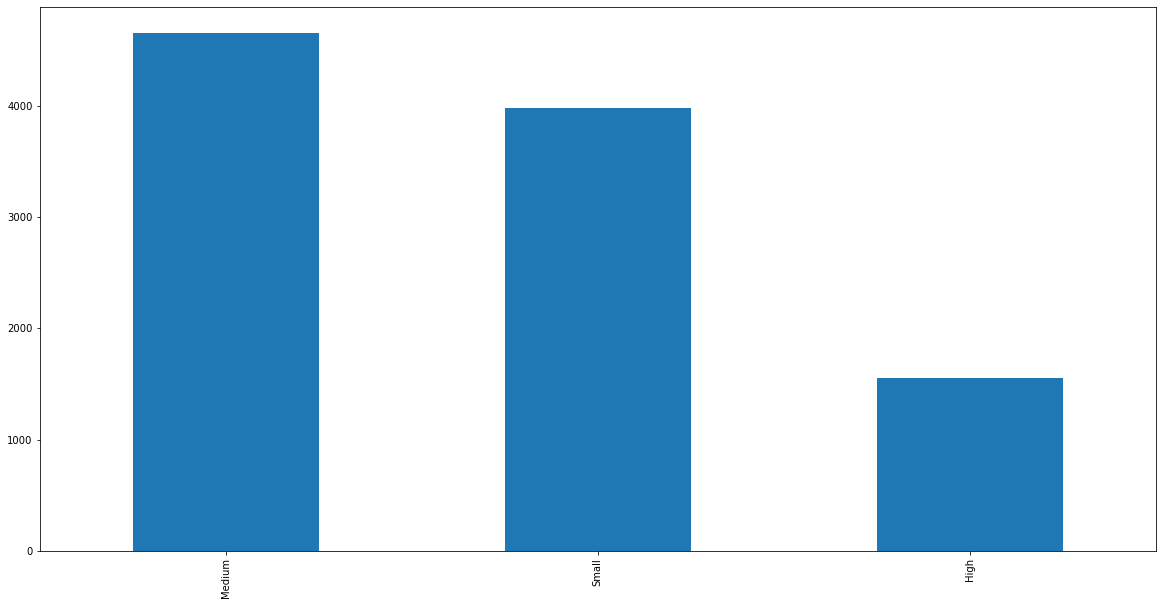

In [564]:
sales.Outlet_Size.value_counts().plot(kind='bar')

<AxesSubplot:>

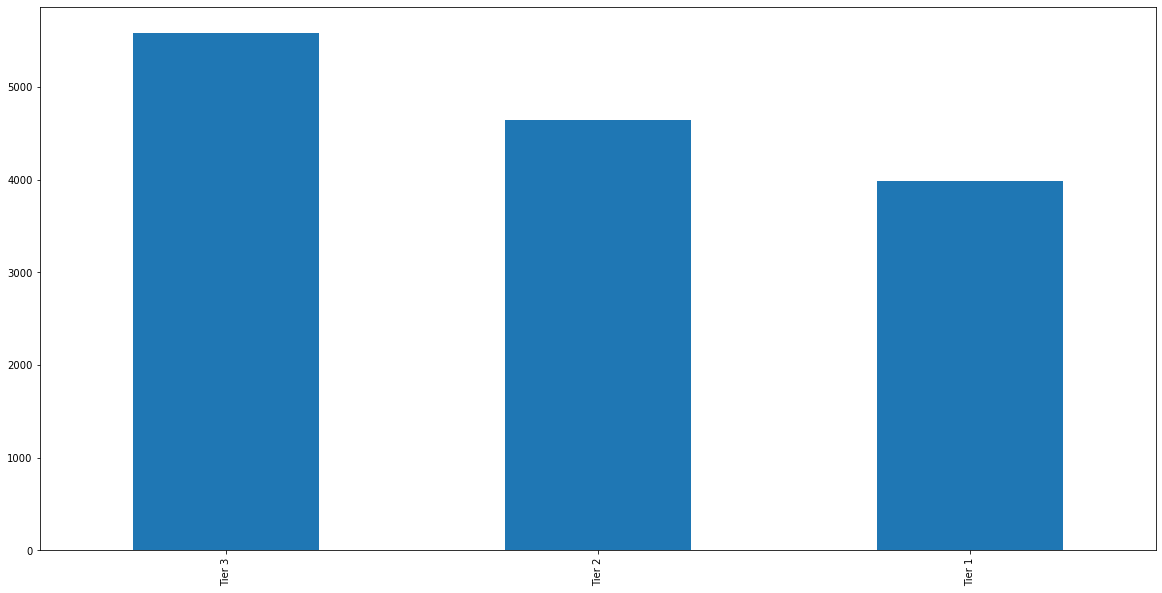

In [565]:
sales.Outlet_Location_Type.value_counts().plot(kind='bar')

In [566]:
# Infrence : The company sales are mostly driven from the TIER 3 type of cities
 # The medium type stores drive the most of sales and profit 

In [567]:
# Outlet_Type

In [677]:
sales.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

# SUMMARY

# Out 27 is the maximum revenue genrator for the buisness
# We relaize this stores is the mostly opened in Tier 3 cities and the type of the outlet is medium size outlet
# The items that are sold in the outlet are fruits and veggies,snacks,frozen, household followed by diary
# Most of the items are genrally low fat and regular types 
# The lowest performing outelets are out10 and out19 
# super market type 1 appear the most commonly seen outlet across the the locations 
# 

# BIVARIATE ANALYSIS:

In [569]:
# NUM vs NUM 
# CAT vs NUM
# CAT vs CAT


In [570]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [571]:
# NUM vs NUM 
# Item weight vs sales 


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

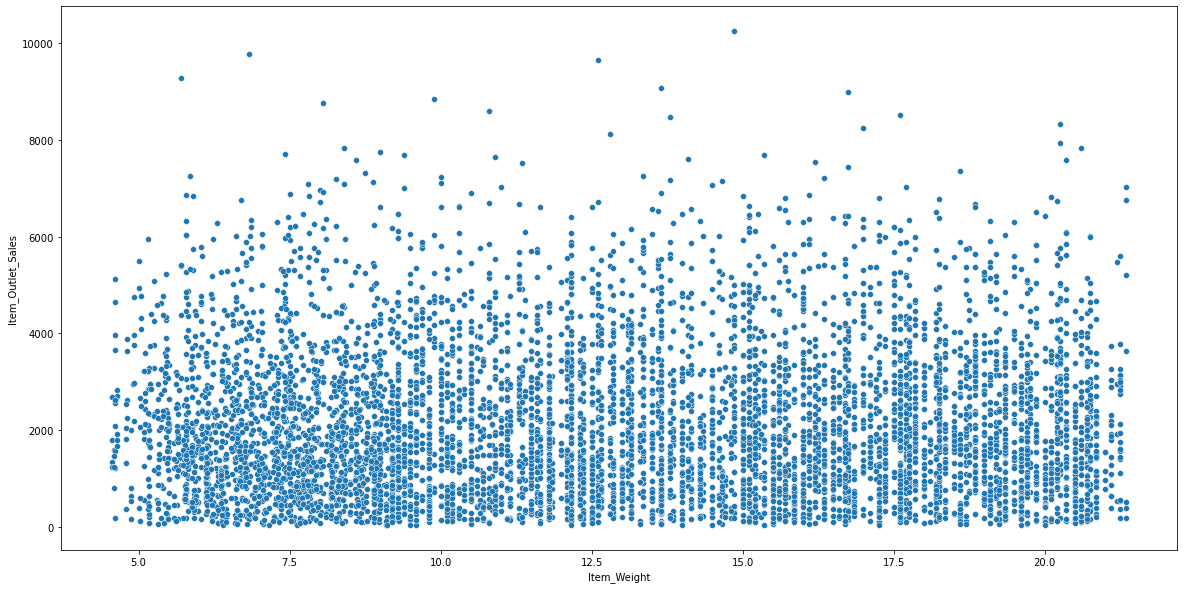

In [572]:
sns.scatterplot(sales.Item_Weight,sales.Item_Outlet_Sales)
# NO pattern with sales 

In [573]:
# Check the correlation  between sales and weight 
sales.loc[:,['Item_Weight','Item_Outlet_Sales']].corr()
# There is no correlation between both the variables 

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.014123
Item_Outlet_Sales,0.014123,1.000000


In [574]:
# Item MRP vs sales

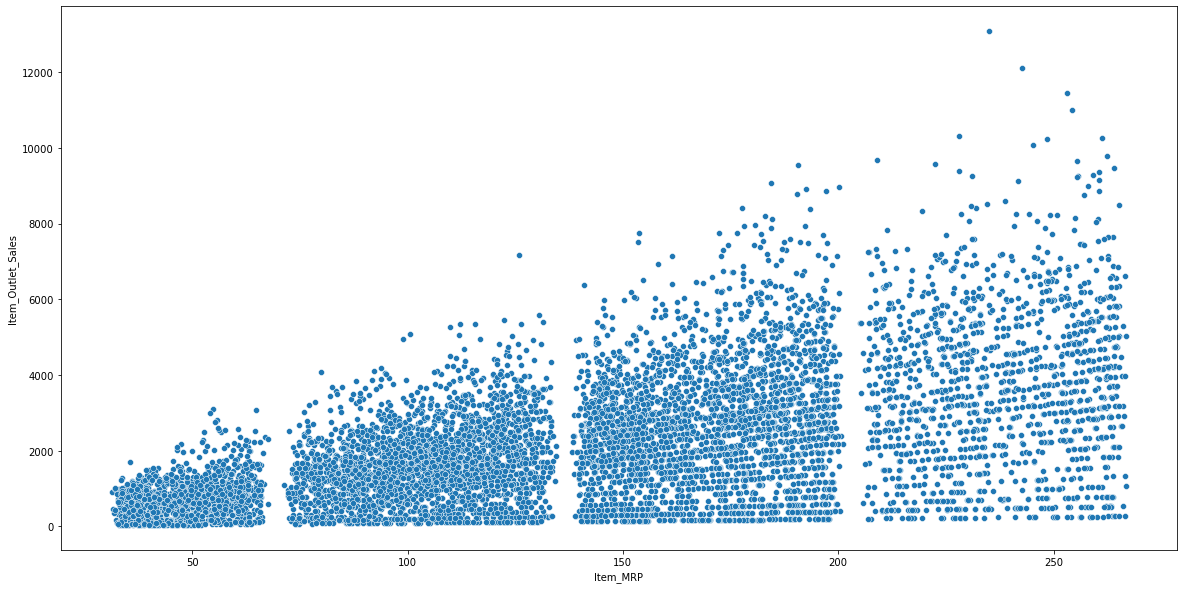

In [575]:
sns.scatterplot(sales.Item_MRP,sales.Item_Outlet_Sales)
plt.show()
# This is creating a pseduo effect and showing false pattern 

In [678]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


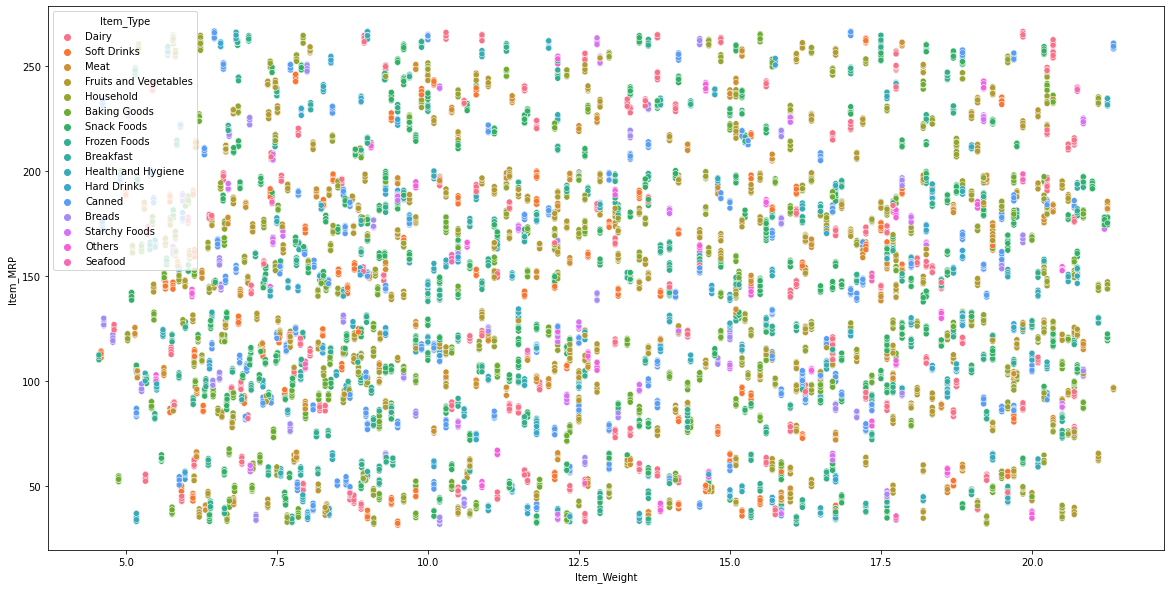

In [577]:
sns.scatterplot(sales.Item_Weight,sales.Item_MRP,hue=sales.Item_Type)
plt.show()

In [578]:
# Visibilty vs Sales 

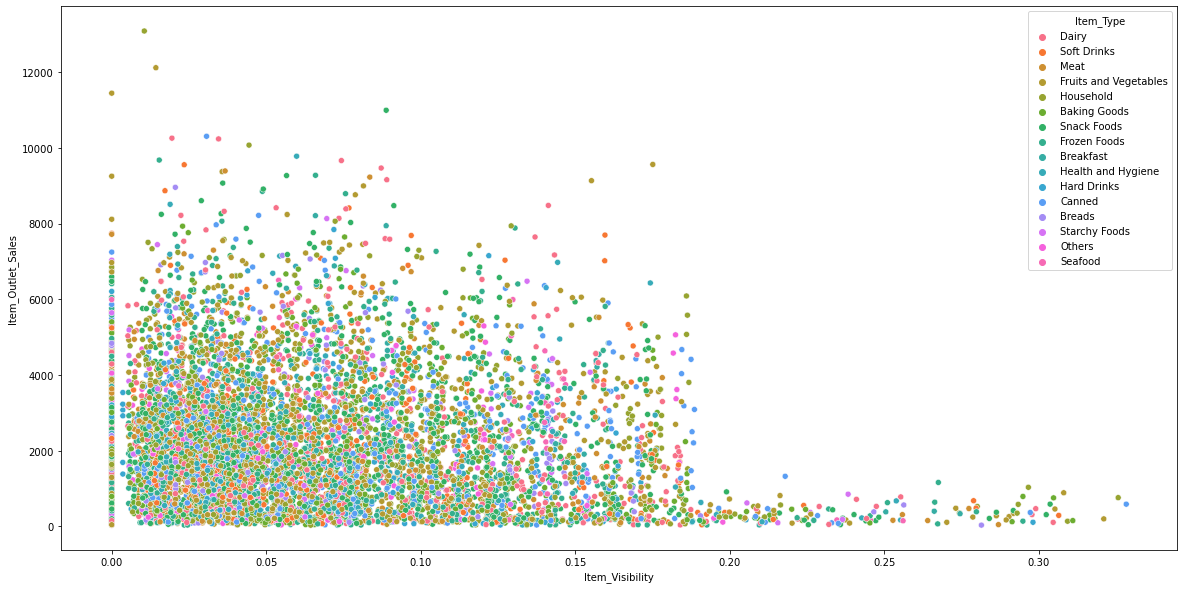

In [579]:
sns.scatterplot(sales.Item_Visibility,sales.Item_Outlet_Sales,hue=sales.Item_Type)
plt.show()

# Infrence of Bivariate analysis (Num vs Num variable)

In [580]:
# Item visibility vs sales show that as the visibilty increases the sales decraeses 
# Item MRP vs Sales show 4 clusters & correlation is also good 


In [581]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [582]:
sales.loc[:,nums].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


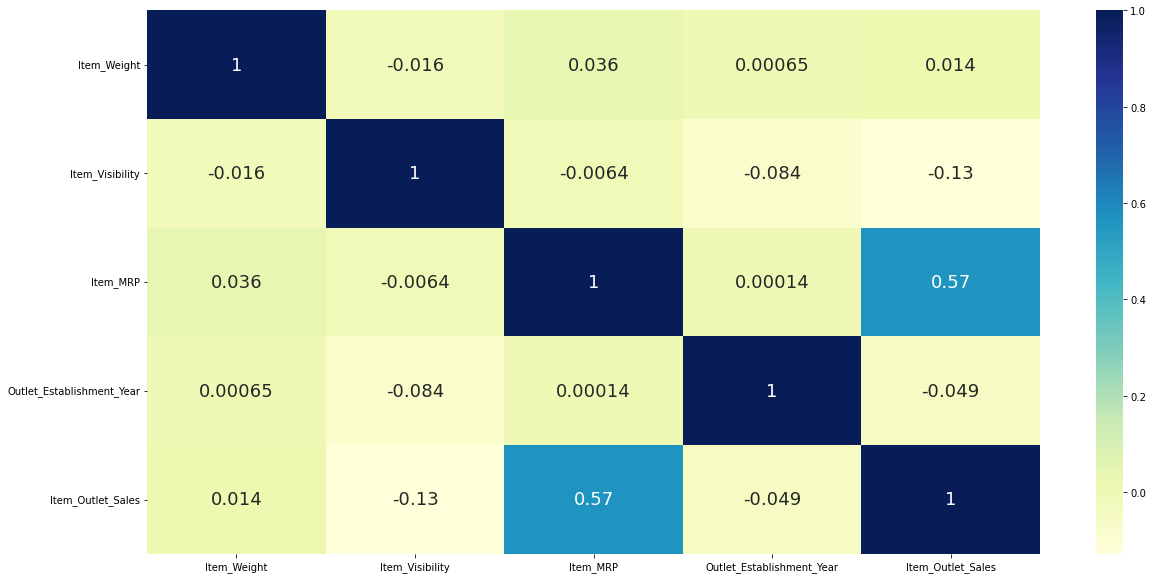

In [583]:
sns.heatmap(sales.loc[:,nums].corr(),annot=True,cmap='YlGnBu',annot_kws={'size':18})
plt.show()

In [584]:
# Cat Vs NUM
# Item Type vs sales

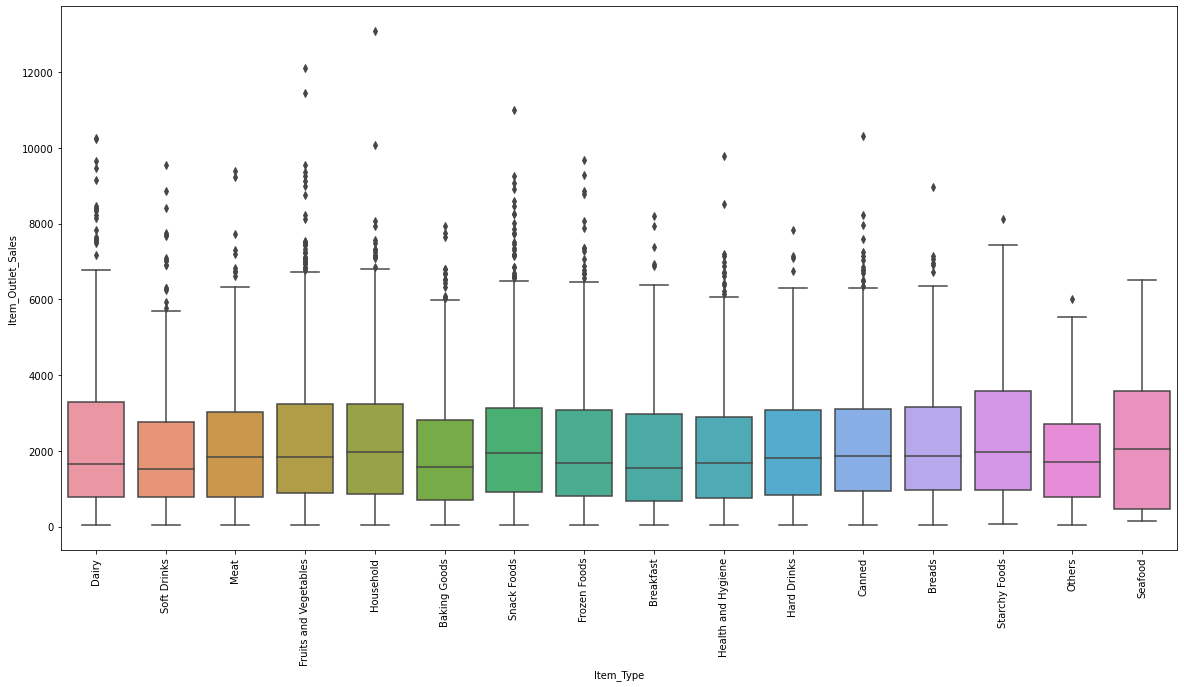

In [585]:
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

In [586]:
# Lets see seafood 


In [587]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


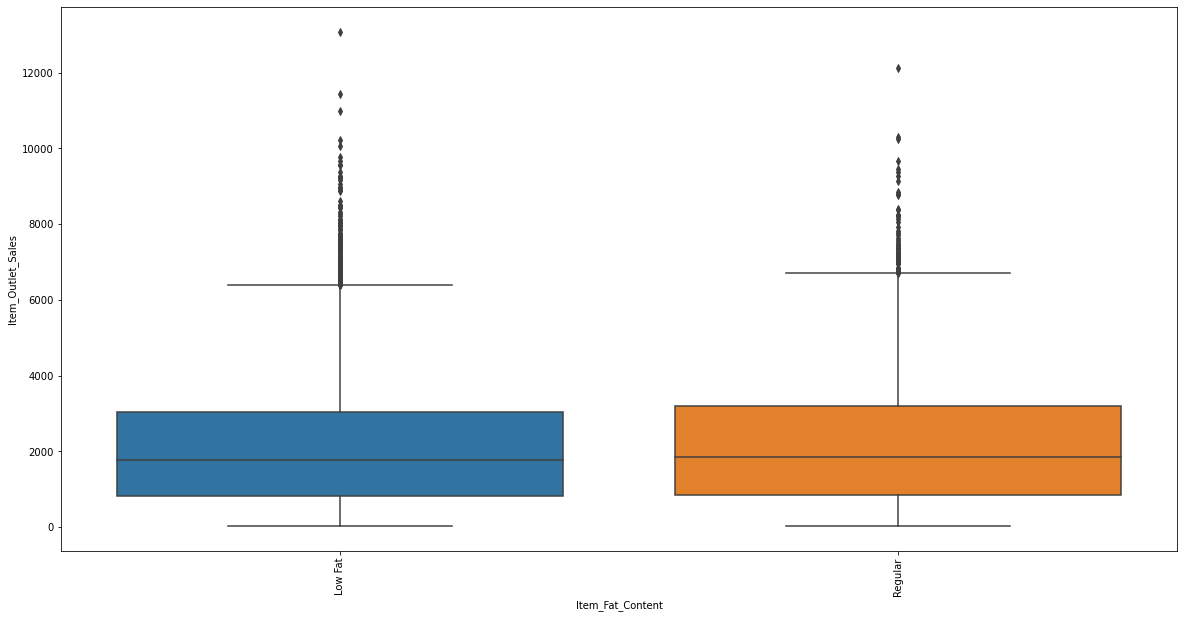

In [588]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

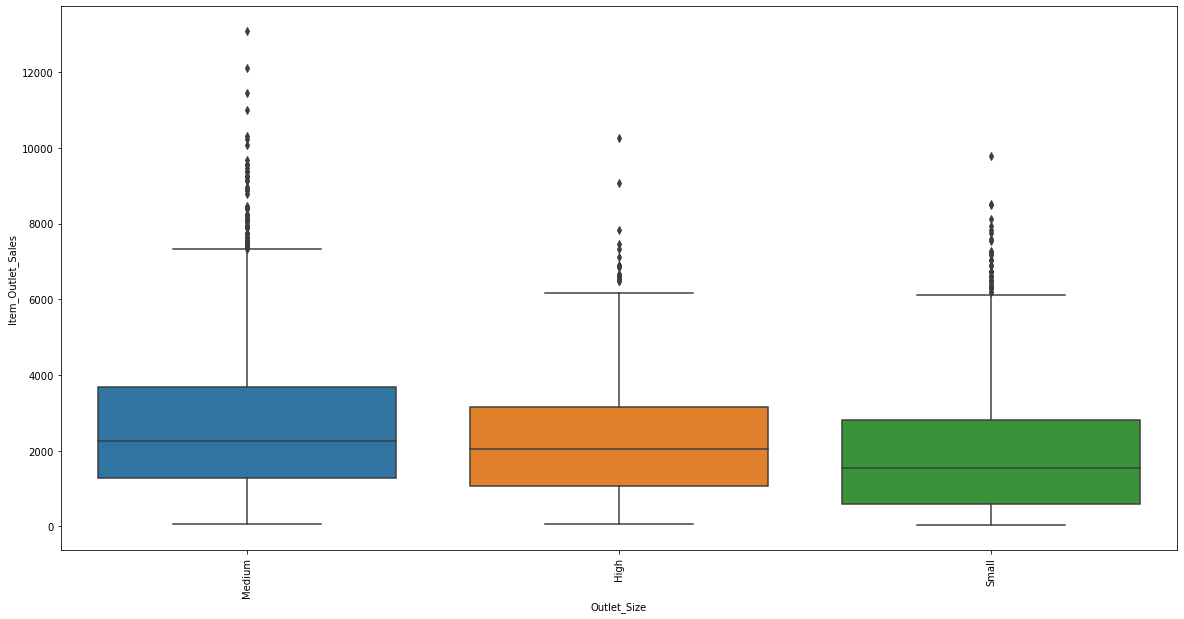

In [589]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

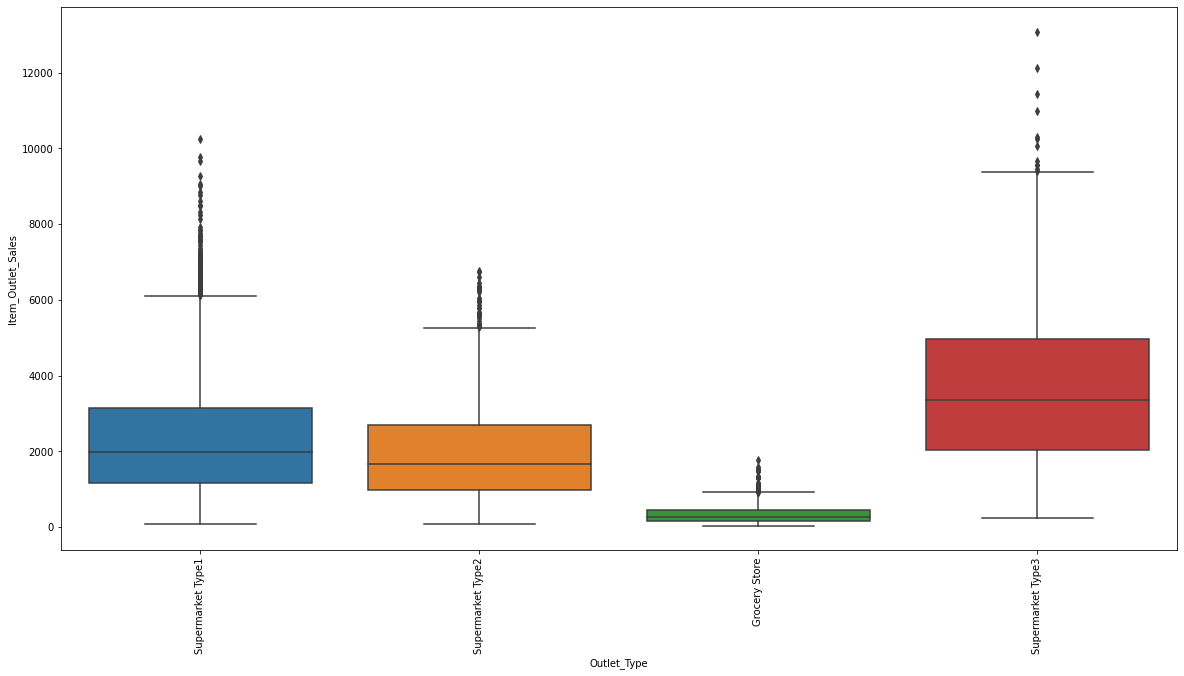

In [590]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

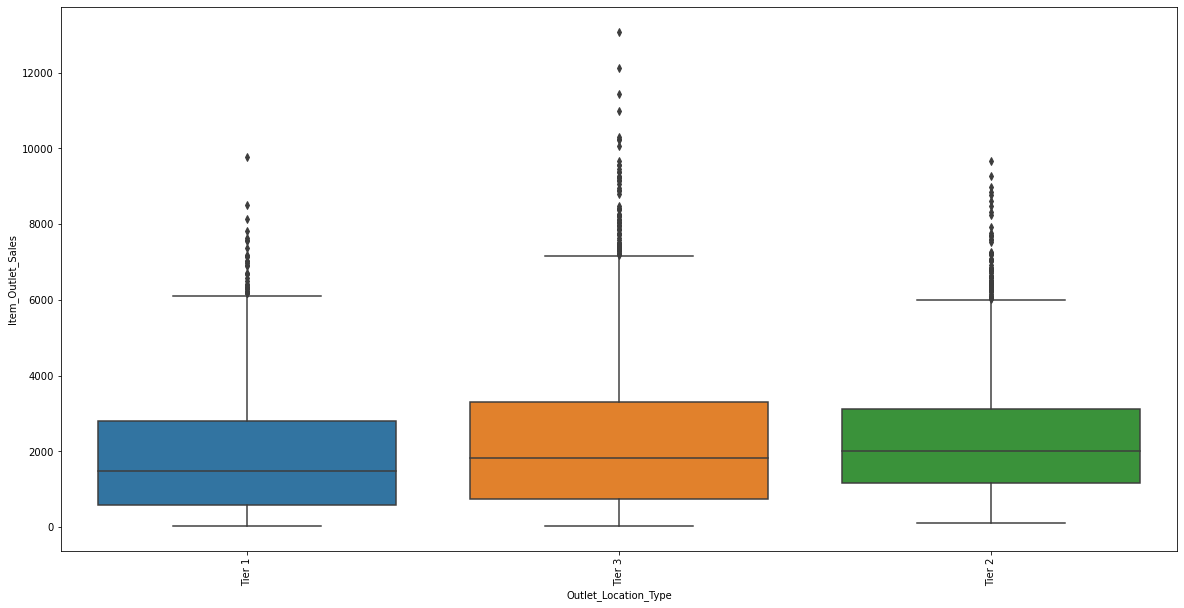

In [591]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

In [592]:
# Infrences of Bivariate anaylsis:
# supermaket type 3 stores has the maximum sales for the business and followed by the super market type 1 
# Grocery store type has the minimum sales out of all the type of outlets 
# The most of the sales are derived from Tier 3 type of location for business 
# Medium size outlets derrives the maximum sales out of all 
# Low Fat products are more likely to sold out as compare to regular one 


In [593]:
cat=sales.select_dtypes(include='object').columns

In [594]:
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

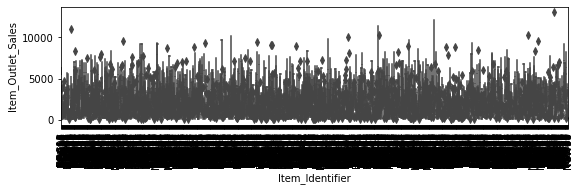

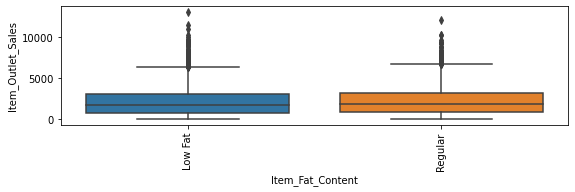

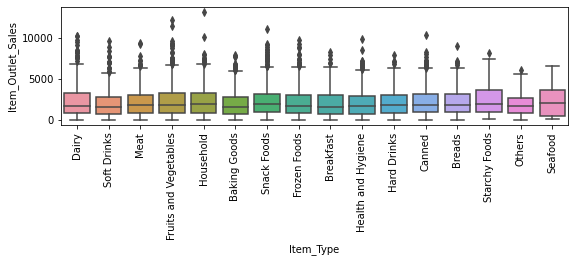

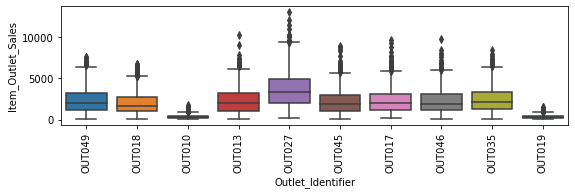

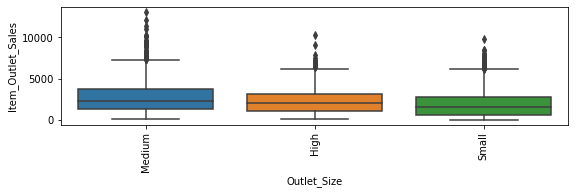

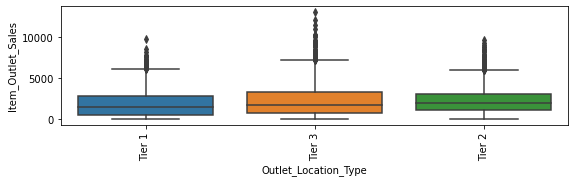

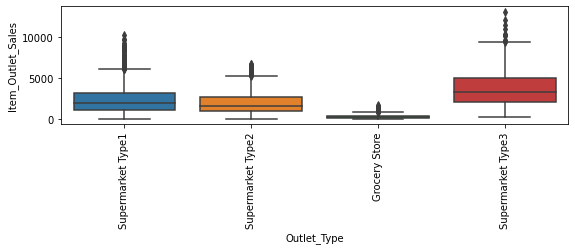

In [595]:

plt.rcParams['figure.figsize']=[20,10]
n_rows=4
n_cols=2
counter=1
for i in cat:
    plt.subplot(n_rows,n_cols,counter)
    sns.boxplot(x=i,y='Item_Outlet_Sales',data=sales)
    plt.xticks(rotation=90)
    plt.show()
    counter+=1
    

# ### Feature Engineering

In [680]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [681]:
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [682]:
sales['Id_Item_Cat']=sales.Item_Identifier.str[0:2]

In [683]:
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [684]:
# fixing the Item Fat content 
# The column is already fixed  in uppere rows


In [685]:
# We need to change the category of NC into a new category 

In [686]:
sales.loc[sales.Id_Item_Cat=='NC','Item_Fat_Content']='Non Edible'

In [687]:
# Creating categories perishable and non persihable

In [688]:
perish=['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast',  
       'Breads', 'Starchy Foods',  'Seafood']

In [689]:
def perishkardo(x):
    if x in perish:
        return('Perishable')
    else:
        return('Non Perishable')

In [690]:
sales['Item_cat']=sales.Item_Type.apply(perishkardo)

In [607]:
# Lets talk about outlet Id
# binning the outlet id into three categories

In [691]:
lowes =["OUT010", "OUT019"]
high =["OUT013", "OUT027"]


def outlets(x):
    if x in lowes:
        return("Low_performers")
    elif x in high:
        return("high_performers")
    else: 
        return("Avg_performers") 
    
    
sales["Out_Cat"]=sales.Outlet_Identifier.apply(outlets)

In [609]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Non Perishable,Avg_performers
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,Perishable,Avg_performers
5678,NCO17,10.00,Non Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,NC,Non Perishable,Avg_performers
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,FD,Non Perishable,Avg_performers


In [692]:
# establishment Year
sales['vintage']=2013-sales.Outlet_Establishment_Year

In [611]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Non Perishable,Avg_performers,16
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,Perishable,Avg_performers,4
5678,NCO17,10.00,Non Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,NC,Non Perishable,Avg_performers,11
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,FD,Non Perishable,Avg_performers,6


In [693]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Non Perishable,Avg_performers,16
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,Perishable,Avg_performers,4
5678,NCO17,10.00,Non Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,NC,Non Perishable,Avg_performers,11
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,FD,Non Perishable,Avg_performers,6


# Missing Values

In [694]:
sales.loc[sales.Item_Identifier=='FDA15'] # Item weight has the missing values and it is dependent on Item identifier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,FD,Perishable,Avg_performers,11
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,FD,Perishable,Avg_performers,9
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,FD,Perishable,Avg_performers,4
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,FD,Perishable,Low_performers,15
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,FD,Perishable,high_performers,26
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,FD,Perishable,high_performers,28
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,FD,Perishable,Avg_performers,6
1115,FDA15,9.3,Low Fat,0.016022,Dairy,249.9092,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Perishable,Avg_performers,16


In [614]:
# so we will take the Item Identifier to replace the missing value 

In [615]:
# There are two functions in fillna()
# 1.fflill() # forward row filling
# 2.bfill()  # backward row filling 

In [696]:
sales['Item_Weight']=sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [697]:
sales.loc[sales.Item_Weight.isnull()] # These are the single entries so the mean is not there 
# so the fill na method did not work 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage


In [698]:
print(sales.loc[sales.Item_Type=='Frozen Foods','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Snack Foods','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Dairy','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Baking Goods','Item_Weight'].mean())

12.570056100981807
12.885062845650994
13.221958626760603
12.273416206261544


In [699]:
sales.loc[(sales.Item_Type=='Frozen Foods')&(sales.Item_Weight.isnull()),'Item_Weight']=12.7824

In [700]:
sales.loc[(sales.Item_Type=='Snack Foods')&(sales.Item_Weight.isnull()),'Item_Weight']=13.0312

In [701]:
sales.loc[(sales.Item_Type=='Dairy')&(sales.Item_Weight.isnull()),'Item_Weight']=13.3799

In [702]:
sales.loc[(sales.Item_Type=='Baking Goods')&(sales.Item_Weight.isnull()),'Item_Weight']=12.2853

In [703]:
sales.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [704]:
sales.loc[sales.Outlet_Size.isnull(),['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    3091
Tier 3                Grocery Store         925
dtype: int64

In [705]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Size']='Medium'

# Scaling

In [708]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26


In [710]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Id_Item_Cat', 'Item_cat',
       'Out_Cat', 'vintage'],
      dtype='object')

In [711]:
# Drop the unnecessary variables 

In [712]:
Finaldata=sales.drop(["Item_Identifier",'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year'],axis=1)

In [718]:
Finaldata["Item_Outlet_Sales"].fillna(np.mean(Finaldata["Item_Outlet_Sales"]),inplace=True)

In [719]:
Finaldata.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Id_Item_Cat             0
Item_cat                0
Out_Cat                 0
vintage                 0
dtype: int64

In [720]:
from sklearn.preprocessing import StandardScaler


In [721]:
sc=StandardScaler()
Finaldata['scaled_sales']=sc.fit_transform(pd.DataFrame(Finaldata.Item_Outlet_Sales))

In [722]:
sc=StandardScaler()
Finaldata['scaled_mrp']=sc.fit_transform(pd.DataFrame(Finaldata.Item_MRP))

In [723]:
sc=StandardScaler()
Finaldata['scaled_Weight']=sc.fit_transform(pd.DataFrame(Finaldata.Item_Weight))

In [724]:
sc=StandardScaler()
Finaldata['scaled_visible']=sc.fit_transform(pd.DataFrame(Finaldata.Item_Visibility))

In [725]:
sc=StandardScaler()
Finaldata['scaled_vintage']=sc.fit_transform(pd.DataFrame(Finaldata.vintage))

In [726]:
Finaldata

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.138000,FD,Perishable,Avg_performers,14,1.175539e+00,1.752511,-0.751014,-0.969852,-0.139681
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.422800,DR,Non Perishable,Avg_performers,4,-1.314755e+00,-1.493696,-1.477653,-0.907063,-1.334228
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.270000,FD,Perishable,Avg_performers,14,-6.356315e-02,0.009874,1.011839,-0.956000,-0.139681
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.380000,FD,Perishable,Low_performers,15,-1.096149e+00,0.661838,1.377308,-1.281712,-0.020226
4,8.93,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.705200,NC,Non Perishable,high_performers,26,-8.976908e-01,-1.403623,-0.830557,-1.281712,1.293777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,2181.288914,FD,Non Perishable,Avg_performers,16,1.720159e-15,0.005000,-0.493036,-1.019425,0.099229
5677,7.60,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,2181.288914,FD,Perishable,Avg_performers,4,1.720159e-15,0.453249,-1.116483,1.497142,-1.334228
5678,10.00,Non Edible,0.073529,118.7440,Medium,Tier 2,Supermarket Type1,2181.288914,NC,Non Perishable,Avg_performers,11,1.720159e-15,-0.358558,-0.600527,0.147226,-0.498045
5679,15.30,Regular,0.000000,214.6218,Medium,Tier 2,Supermarket Type1,2181.288914,FD,Non Perishable,Avg_performers,6,1.720159e-15,1.185747,0.538878,-1.281712,-1.095319


In [727]:
# Lets drop the orignal values 

In [728]:
newdata=Finaldata.drop(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','vintage'],axis=1)

In [729]:
newdata.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,1.175539,1.752511,-0.751014,-0.969852,-0.139681
1,Regular,Medium,Tier 3,Supermarket Type2,DR,Non Perishable,Avg_performers,-1.314755,-1.493696,-1.477653,-0.907063,-1.334228
2,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,-0.063563,0.009874,1.011839,-0.956000,-0.139681
3,Regular,Medium,Tier 3,Grocery Store,FD,Perishable,Low_performers,-1.096149,0.661838,1.377308,-1.281712,-0.020226
4,Non Edible,High,Tier 3,Supermarket Type1,NC,Non Perishable,high_performers,-0.897691,-1.403623,-0.830557,-1.281712,1.293777


In [730]:
# Scaling the Outlet size 

In [731]:
newdata['Outlet_Size']=newdata.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

In [732]:
newdata.describe(include ="object")

,Item_Fat_Content,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat
count,14204,14204,14204,14204,14204,14204
unique,6,3,4,3,2,3
top,Low Fat,Tier 3,Supermarket Type1,FD,Non Perishable,Avg_performers
freq,5998,5583,9294,10201,9359,9287


In [733]:
newdata

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,Low Fat,2,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,1.175539e+00,1.752511,-0.751014,-0.969852,-0.139681
1,Regular,2,Tier 3,Supermarket Type2,DR,Non Perishable,Avg_performers,-1.314755e+00,-1.493696,-1.477653,-0.907063,-1.334228
2,Low Fat,2,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,-6.356315e-02,0.009874,1.011839,-0.956000,-0.139681
3,Regular,2,Tier 3,Grocery Store,FD,Perishable,Low_performers,-1.096149e+00,0.661838,1.377308,-1.281712,-0.020226
4,Non Edible,3,Tier 3,Supermarket Type1,NC,Non Perishable,high_performers,-8.976908e-01,-1.403623,-0.830557,-1.281712,1.293777
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,1,Tier 1,Supermarket Type1,FD,Non Perishable,Avg_performers,1.720159e-15,0.005000,-0.493036,-1.019425,0.099229
5677,Regular,2,Tier 3,Supermarket Type2,FD,Perishable,Avg_performers,1.720159e-15,0.453249,-1.116483,1.497142,-1.334228
5678,Non Edible,2,Tier 2,Supermarket Type1,NC,Non Perishable,Avg_performers,1.720159e-15,-0.358558,-0.600527,0.147226,-0.498045
5679,Regular,2,Tier 2,Supermarket Type1,FD,Non Perishable,Avg_performers,1.720159e-15,1.185747,0.538878,-1.281712,-1.095319


In [734]:
dummydata=pd.get_dummies(newdata, drop_first=True)

In [737]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Outlet_Size                    14204 non-null  int64  
 1   scaled_sales                   14204 non-null  float64
 2   scaled_mrp                     14204 non-null  float64
 3   scaled_Weight                  14204 non-null  float64
 4   scaled_visible                 14204 non-null  float64
 5   scaled_vintage                 14204 non-null  float64
 6   Item_Fat_Content_Low Fat       14204 non-null  uint8  
 7   Item_Fat_Content_Non Edible    14204 non-null  uint8  
 8   Item_Fat_Content_Regular       14204 non-null  uint8  
 9   Item_Fat_Content_low fat       14204 non-null  uint8  
 10  Item_Fat_Content_reg           14204 non-null  uint8  
 11  Outlet_Location_Type_Tier 2    14204 non-null  uint8  
 12  Outlet_Location_Type_Tier 3    14204 non-null  

In [738]:
y=Finaldata["Item_Outlet_Sales"]
x=dummydata.copy()

In [739]:
a=x.drop("scaled_sales", axis=1)

In [740]:
from sklearn import linear_model

In [807]:
import statsmodels.api as sm
a=sm.add_constant(a)

model = linear_model.LinearRegression()

model=sm.OLS(y_train,final_x_train).fit()  ##Ordinally least square method.
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.249e+07
Date:                Sun, 14 Aug 2022   Prob (F-statistic):                        0.00
Time:                        09:57:10   Log-Likelihood:                         -6354.0
No. Observations:                8523   AIC:                                  1.969e+04
Df Residuals:                    5031   BIC:                                  4.431e+04
Df Model:                        3492                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [813]:
#x_train.drop(columns="scaled_sales", inplace=True)


In [520]:
#Independent varible = a
#Dependent variable = y

In [521]:
## Now we will export the file as a csv file. keeping only Item_Identifier, Outlet_Identifier, Item_Outlet_Sale


In [787]:
df_train=Finaldata.iloc[:8523]
df_test=Finaldata.iloc[8523:]

In [792]:
x_train=df_train.drop(columns="Item_Outlet_Sales", axis=1)
y_train=df_train.Item_Outlet_Sales

In [818]:
x_test=df_test.drop(columns="Item_Outlet_Sales", axis=1)
y_test=df_test.Item_Outlet_Sales

In [826]:
final_x_test=pd.get_dummies(x_test,drop_first=True)
final_x_train=pd.get_dummies(x_test, drop_first=True)

In [827]:
final_x_test.drop(columns="scaled_sales", inplace=True)

In [828]:
import statsmodels.api as sm
a=sm.add_constant(a)

model = linear_model.LinearRegression()

model=sm.OLS(y_test,final_x_test).fit()  ##Ordinally least square method.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                    -338.087
Model:                            OLS   Adj. R-squared:               -339.165
Method:                 Least Squares   F-statistic:                    -313.6
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               1.00
Time:                        10:04:14   Log-Likelihood:             1.3684e+05
No. Observations:                5681   AIC:                        -2.736e+05
Df Residuals:                    5662   BIC:                        -2.735e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_Weight   

In [829]:
#csv=sales[["Item_Identifier","Outlet_Identifier"]]

y_test.shape
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat,vintage,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,FD,Non Perishable,Avg_performers,14,1.720159e-15,-0.533831,1.710530,-1.134699,-0.139681
1,8.300,reg,0.038428,87.3198,Medium,Tier 2,Supermarket Type1,FD,Perishable,Avg_performers,6,1.720159e-15,-0.864708,-0.965996,-0.534917,-1.095319
2,14.600,Non Edible,0.099575,241.7538,Medium,Tier 3,Grocery Store,NC,Non Perishable,Low_performers,15,1.720159e-15,1.622763,0.388391,0.653405,-0.020226
3,7.315,Low Fat,0.015388,155.0340,Medium,Tier 2,Supermarket Type1,FD,Non Perishable,Avg_performers,6,1.720159e-15,0.225966,-1.177753,-0.982657,-1.095319
4,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,FD,Perishable,high_performers,28,1.720159e-15,1.501577,0.173409,1.023121,1.532686


In [837]:
data=pd.concat([csv,y_test],axis=1)

In [833]:
csv=z[["Item_Identifier","Outlet_Identifier"]]

In [838]:
data.shape

(5681, 3)

In [839]:
data.to_csv("Bigmarket.csv", index=False)